<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Clipping%20Raster%20In%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clip Raster in R
#### https://www.earthdatascience.org/courses/earth-analytics/lidar-raster-data-r/crop-raster-data-in-r/

In [19]:
# load the raster and rgdal libraries
install.packages("raster")
install.packages("rgdal")
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("raster"):
“installation of package ‘raster’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
# install.packages('sf')
# install.packages('exactextractr')
# install.packages("DBI")
# install.packages("RSQLite")
# install.packages("RPostgreSQL")

In [21]:
library(ggplot2)
# library(sf)
library(magrittr)
library(data.table)
library(raster)
# library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

In [22]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b5f75bc8dfabfe5850767829ba60f248&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbFkxX0NHZmpKLVhvS3BNWlFvSTVHcmtCUVNsYzMwWUZQZE9zOG9ucjdrc0l0WTRhYzVUZUN6YnIxWnJuUjhVZyIsInN0YXRlIjoiYjVmNzViYzhkZmFiZmU1ODUwNzY3ODI5YmE2MGYyNDgifQ==


In [23]:
dir.create('/content/Lanai')

Warning message in dir.create("/content/Lanai"):
“'/content/Lanai' already exists”


In [ ]:
# extract the data from drive and bring it to local memory
#  Island Path LS 3x, CCAP 1x

# LS 2000 https://drive.google.com/file/d/1ftBKMbYp5TxsdyRtK4bEGmb-JT43s-Aa/view?usp=drive_link
drive_download(file = as_id('1ftBKMbYp5TxsdyRtK4bEGmb-JT43s-Aa'), path =  '/content/Lanai/2000.tif', overwrite = FALSE)
# LS 2001 https://drive.google.com/file/d/1EXjKIHySNRVZIplTd2fKjH2wNakWjQxo/view?usp=drive_link
drive_download(file = as_id('1EXjKIHySNRVZIplTd2fKjH2wNakWjQxo'), path =  '/content/Lanai/2001.tif', overwrite = FALSE)
# LS 2002 https://drive.google.com/file/d/1n2NrtrDmT6n1Xvl9FP8AVABgY_LACecr/view?usp=drive_link
drive_download(file = as_id('1n2NrtrDmT6n1Xvl9FP8AVABgY_LACecr'), path =  '/content/Lanai/2002.tif', overwrite = FALSE)

# CCAP 2005 https://drive.google.com/file/d/1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0/view?usp=drive_link
drive_download(file = as_id('1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0'), path =  '/content/Lanai/CCAP.tif', overwrite = FALSE)

In [59]:
ccap_raster <- stack('/content/Lanai/CCAP.tif')
ls_2000 <- stack('/content/Lanai/2000.tif')
ls_2001 <- stack('/content/Lanai/2001.tif')
ls_2002 <- stack('/content/Lanai/2002.tif')
ls_stack <- c(ls_2000, ls_2001, ls_2002)

In [ ]:
ccap_raster%>% plot

In [ ]:
ls_2000%>% plot

In [62]:
# Stack all three layers into one
stack_all <- stack(ls_2000, ls_2001, ls_2002)

# Define the output file path
output_path <- '/content/Lanai/stacked.tif'

# Write the stacked raster to a new .tif file
writeRaster(stack_all, filename = output_path, format = 'GTiff')

# Check the new file
stack_all

class      : RasterStack 
dimensions : 1112, 1363, 1515656, 21  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -157.1164, -156.7491, 20.68128, 20.98096  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Green.1, Red.1, NIR.1, SWIR1.1, SWIR2.1, elevation.1, Blue.2, Green.2, Red.2, NIR.2, SWIR1.2, SWIR2.2, elevation.2, Blue.3, ... 


In [73]:
nrow(ccap_raster)
ncol(ccap_raster)
nlayers(ccap_raster)
dim(ccap_raster)

[1] 9497

[1] 11754

[1] 1

[1]  9497 11754     1

In [74]:
nrow(stack_all)
ncol(stack_all)
nlayers(stack_all)
dim(stack_all)

[1] 1112

[1] 1363

[1] 21

[1] 1112 1363   21

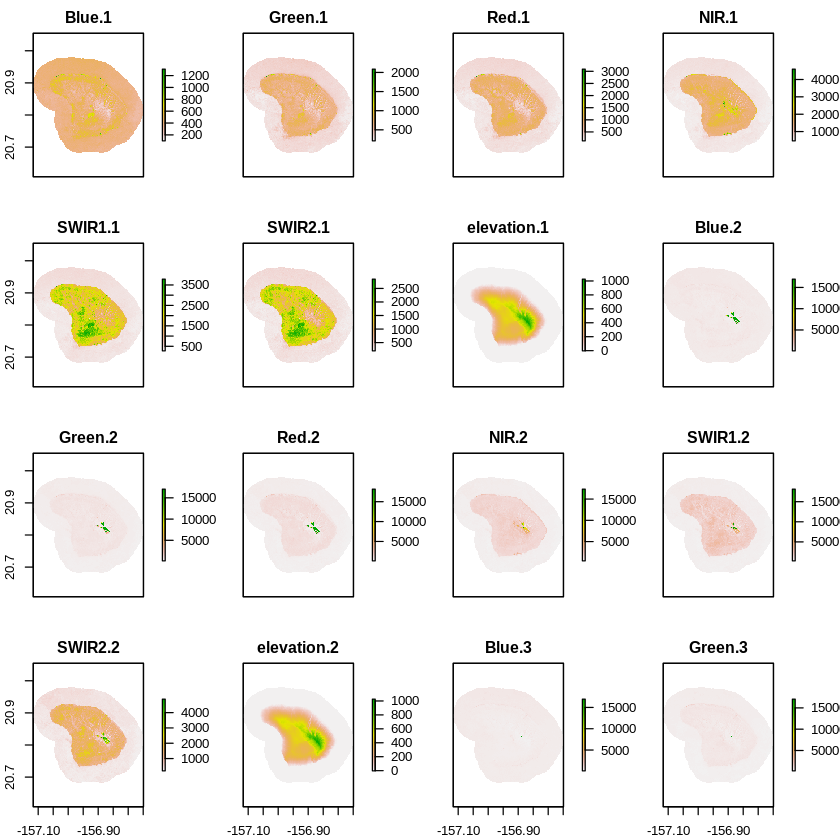

In [75]:
stack_all%>% plot

In [79]:
e <- extent(stack_all)

In [80]:
e

class      : Extent 
xmin       : -157.1164 
xmax       : -156.7491 
ymin       : 20.68128 
ymax       : 20.98096 

In [81]:
e <- extent(ccap_raster)

In [82]:
e

class      : Extent 
xmin       : 700997.6 
xmax       : 729207.2 
ymin       : 2293328 
ymax       : 2316121 

In [83]:
ls_raster_extended <- extend(stack_all, projectExtent(ccap_raster, stack_all), value=NA)

In [84]:
ls_raster_extended

class      : RasterStack 
dimensions : 1112, 1363, 1515656, 21  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -157.1164, -156.7491, 20.68128, 20.98096  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue.1, Green.1, Red.1, NIR.1, SWIR1.1, SWIR2.1, elevation.1, Blue.2, Green.2, Red.2, NIR.2, SWIR1.2, SWIR2.2, elevation.2, Blue.3, ... 


In [85]:
e <- extent(ls_raster_extended)

In [86]:
e

class      : Extent 
xmin       : -157.1164 
xmax       : -156.7491 
ymin       : 20.68128 
ymax       : 20.98096 

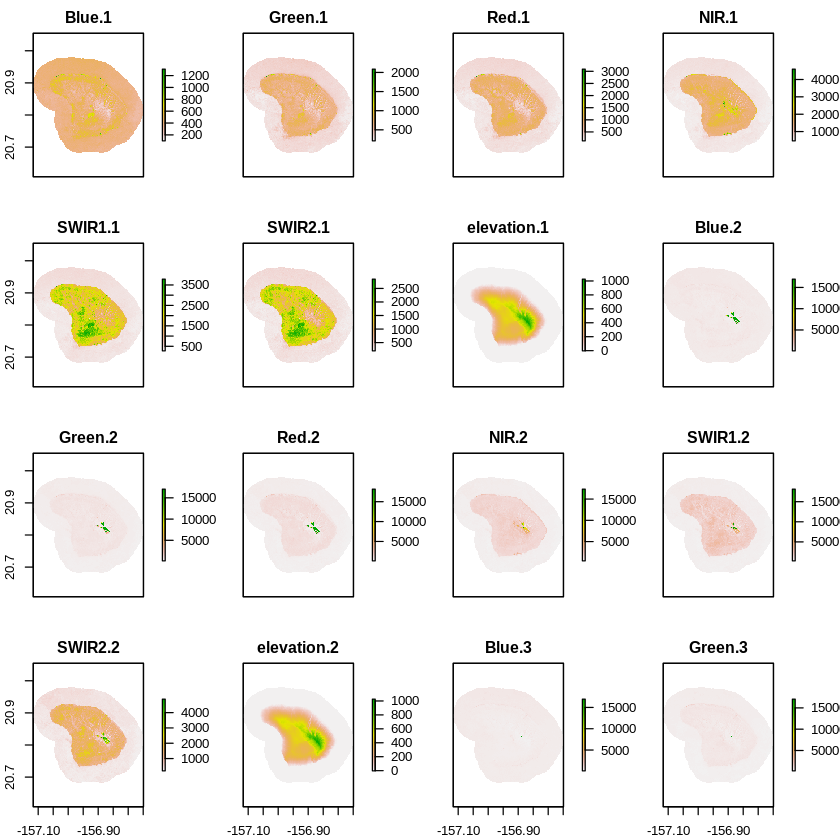

In [88]:
ls_raster_extended%>%plot

In [89]:

y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

In [90]:
new_folder_path <- "/content/Lanai/Images"
new_folder_path2 <- "/content/Lanai/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/Lanai/Images 
Folder created: /content/Lanai/Labels 


In [91]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(ls_raster_extended, projectExtent(ccap_cropped_raster,stack_all))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/Lanai/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/Lanai/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Lanai_2000_2002.csv") # /content/Maui10/


class      : RasterBrick 
dimensions : 512, 512, 262144, 21  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 700997.6, 702226.4, 2314890, 2316119  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :   Blue.1,  Green.1,    Red.1,    NIR.1,  SWIR1.1,  SWIR2.1, elevation.1,   Blue.2,  Green.2,    Red.2,    NIR.2,  SWIR1.2,  SWIR2.2, elevation.2,   Blue.3, ... 
min values : 353.3693, 298.8007, 224.5361, 557.2811, 375.5066, 263.4772,      0.0000, 433.2527, 392.2885, 351.4052, 664.2680, 478.8119, 345.8323,      0.0000, 424.6319, ... 
max values : 455.2752, 380.0184, 331.1633, 653.4762, 475.4714, 387.3209,      0.0000, 598.2654, 569.5641, 518.1778, 813.5316, 640.3789, 530.3978,      0.0000, 527.6031, ... 

class      : RasterBrick 
dimensions : 512, 512, 262144, 21  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 702228.8, 703457.6, 2314892, 2316121  (xmin, xmax, ymin, ymax)
cr

In [92]:
zip(zipfile = '/content/Lanai/Labels.zip', files = c("/content/Lanai/Labels"))
zip(zipfile = "/content/Lanai/Images.zip", files = c("/content/Lanai/Images"))


    # files = c("/content/Hawaii_2005_009/Images",
    #           "/content/Hawaii_2005_009/Labels",
    #           "/content/Hawaii_2005_009/Hawaii_2005_009.csv"))

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”
Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [94]:
# Island_Image_Clipped Export folder: https://drive.google.com/drive/folders/1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F?usp=drive_link
drive_upload(media = "/content/Lanai/Labels.zip", path = as_id("1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F"))
drive_upload(media = "/content/Lanai/Images.zip", path = as_id("1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F"))
drive_upload(media = "/content/Lanai_2000_2002.csv", path = as_id("1ZViSMmF1BS5rgHiyy2EIl2EnfdsKv96F"))

Local file:

• /content/Lanai/Labels.zip

Uploaded into Drive file:

• Labels.zip <id: 1JOzSi8FKxlUFezXJcq5_gB5YpXrRXVyF>

With MIME type:

• application/zip

Local file:

• /content/Lanai/Images.zip

Uploaded into Drive file:

• Images.zip <id: 1qChBjirOtLPC_fy1k9rC0Jo_ymXiX--j>

With MIME type:

• application/zip

Local file:

• /content/Lanai_2000_2002.csv

Uploaded into Drive file:

• Lanai_2000_2002.csv <id: 1YfH1d7OScYdrO6PXGlnGnSh-zZrsDEjK>

With MIME type:

• text/csv

